In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import metrics

<IPython.core.display.Javascript object>

In [3]:
file_path = "https://github.com/jhl126/bostonmarathon/blob/master/results/2014/results.csv?raw=true"

<IPython.core.display.Javascript object>

In [4]:
yr_2014 = pd.read_csv(file_path, error_bad_lines=False)

<IPython.core.display.Javascript object>

In [5]:
yr_2014.shape

(31984, 21)

<IPython.core.display.Javascript object>

In [6]:
yr_2014.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


<IPython.core.display.Javascript object>

In [7]:
# around 96% of data is missing for ctz, so drop this column
# additionally, state, city, and country seem to be unimportant, so drop state, city, and country column
# less than 1% of data is missing in city column, so drop na's
yr_2014.isna().mean()

10k          0.000000
name         0.000000
division     0.000000
25k          0.000000
gender       0.000000
age          0.000000
official     0.000000
bib          0.000000
genderdiv    0.000000
ctz          0.961106
35k          0.000000
overall      0.000000
pace         0.000000
state        0.080540
30k          0.000000
5k           0.000000
half         0.000000
20k          0.000000
country      0.000000
city         0.000031
40k          0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [8]:
yr_2014 = yr_2014.drop(columns=["ctz", "state", "city", "name", "bib", "country"])

<IPython.core.display.Javascript object>

In [9]:
yr_2014 = yr_2014.dropna()

<IPython.core.display.Javascript object>

In [10]:
yr_2014.dtypes

10k           object
division       int64
25k           object
gender        object
age            int64
official     float64
genderdiv      int64
35k           object
overall        int64
pace         float64
30k           object
5k            object
half          object
20k           object
40k           object
dtype: object

<IPython.core.display.Javascript object>

In [11]:
# converting objects into floats and getting rid of na values
yr_2014["5k"] = yr_2014["5k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["5k"] = yr_2014["5k"].astype(float)

yr_2014["10k"] = yr_2014["10k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["10k"] = yr_2014["10k"].astype(float)

yr_2014["20k"] = yr_2014["20k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["20k"] = yr_2014["20k"].astype(float)

yr_2014["25k"] = yr_2014["25k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["25k"] = yr_2014["25k"].astype(float)

yr_2014["30k"] = yr_2014["30k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["30k"] = yr_2014["30k"].astype(float)

yr_2014["35k"] = yr_2014["35k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["35k"] = yr_2014["35k"].astype(float)

yr_2014["40k"] = yr_2014["40k"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["40k"] = yr_2014["40k"].astype(float)

yr_2014["half"] = yr_2014["half"].replace("-", np.nan, regex=True)
yr_2014 = yr_2014.dropna()
yr_2014["half"] = yr_2014["half"].astype(float)

<IPython.core.display.Javascript object>

In [12]:
# onehot encoding the categorical columns so the data frame can go through pca
cat_cols = ["gender"]
yr_2014 = pd.get_dummies(yr_2014, columns=cat_cols, drop_first=True)
yr_2014.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender_M
0,17.37,8,47.67,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43,1
1,32.58,1,82.43,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,0
2,16.62,1,45.80,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10,1
3,32.57,3,82.43,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,0
4,17.12,2,46.37,40,81.23,2,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72,1


<IPython.core.display.Javascript object>

In [13]:
yr_2014.drop(yr_2014.tail(1).index, inplace=True)  # drop last row to make data even
yr_2014.shape

(31648, 15)

<IPython.core.display.Javascript object>

## Using KMeans with PCA

In [14]:
scaler = StandardScaler()
X_std = scaler.fit_transform(yr_2014)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

<IPython.core.display.Javascript object>

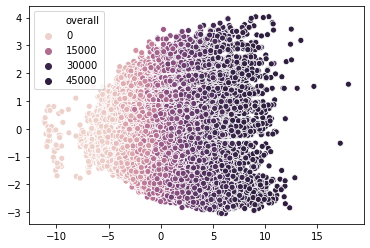

<IPython.core.display.Javascript object>

In [35]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=yr_2014["overall"])

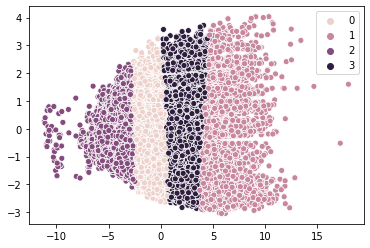

<IPython.core.display.Javascript object>

In [50]:
km = KMeans(n_clusters=4)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

In [42]:
yr_2014["labels"] = km.labels_
yr_2014.groupby("labels").mean()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender_M
labels,,,,,,,,,,,,,,,
0,48.974646,1574.246592,124.940242,43.176481,223.959112,6537.004187,181.566703,13411.539154,8.550191,152.443249,24.435833,104.580238,99.079041,211.107228,0.463163
1,66.275613,3835.616513,179.659242,41.067893,332.234157,14385.386772,269.875217,29244.819755,12.679803,223.644025,32.492354,147.194941,139.200177,314.085502,0.431012
2,41.776751,964.091423,105.510945,37.764562,186.179731,2748.983284,151.548313,3952.952938,7.109194,127.999529,20.911411,88.665653,84.040207,175.547577,0.816124
3,56.522425,2248.706807,146.564191,46.475743,269.613948,11489.395545,217.220646,23056.390223,10.291589,180.589220,28.141584,121.789601,115.331452,254.052224,0.491213


<IPython.core.display.Javascript object>

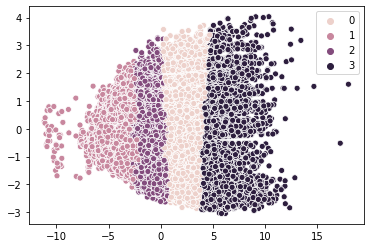

<IPython.core.display.Javascript object>

In [43]:
km = KMeans(n_clusters=4)
km.fit(X_std)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

In [49]:
yr_2014["labels"] = km.labels_
yr_2014.groupby("labels").mean()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender_M
labels,,,,,,,,,,,,,,,
0,56.786237,2340.580176,147.373498,46.200251,271.532134,11729.449686,218.663269,23344.769636,10.364721,181.680954,28.270329,122.416501,115.920838,255.853384,0.513927
1,41.928502,1029.015684,105.955577,38.336170,187.486298,3153.332036,152.417218,4248.558906,7.159026,128.620783,20.986187,89.013514,84.365908,176.724907,0.859696
2,49.319043,1534.039450,125.832461,43.140277,225.180811,6401.018961,182.729693,13752.511053,8.596814,153.494316,24.603004,105.328204,99.790199,212.311422,0.397196
3,66.516365,3852.662197,180.638282,41.108671,334.179119,14479.606474,271.509050,29381.264277,12.753975,224.961720,32.591031,147.914479,139.871692,315.942932,0.438382


<IPython.core.display.Javascript object>

## Using DBSCAN with t-SNE

In [18]:
scaler = StandardScaler()
scaled = scaler.fit_transform(yr_2014)

<IPython.core.display.Javascript object>

In [23]:
tsne = TSNE(n_components=1, perplexity=20)
tsne_results = tsne.fit_transform(scaled)

<IPython.core.display.Javascript object>

In [24]:
dbscan_cluster = DBSCAN()
clusters = dbscan_cluster.fit_predict(tsne_results)
for i in range(1, 26):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(tsne_results)
    print(
        "Number of clusters when min_samples={} is: {}".format(
            i, len(np.unique(clusters))
        )
    )

Number of clusters when min_samples=1 is: 2
Number of clusters when min_samples=2 is: 2
Number of clusters when min_samples=3 is: 2
Number of clusters when min_samples=4 is: 2
Number of clusters when min_samples=5 is: 2
Number of clusters when min_samples=6 is: 2
Number of clusters when min_samples=7 is: 2
Number of clusters when min_samples=8 is: 2
Number of clusters when min_samples=9 is: 2
Number of clusters when min_samples=10 is: 2
Number of clusters when min_samples=11 is: 2
Number of clusters when min_samples=12 is: 2
Number of clusters when min_samples=13 is: 2
Number of clusters when min_samples=14 is: 2
Number of clusters when min_samples=15 is: 2
Number of clusters when min_samples=16 is: 2
Number of clusters when min_samples=17 is: 2
Number of clusters when min_samples=18 is: 2
Number of clusters when min_samples=19 is: 2
Number of clusters when min_samples=20 is: 2
Number of clusters when min_samples=21 is: 2
Number of clusters when min_samples=22 is: 2
Number of clusters 

<IPython.core.display.Javascript object>

In [28]:
dbscan_cluster = DBSCAN()
clusters = dbscan_cluster.fit_predict(tsne_results)

for i in [
    0.03,
    0.04,
    0.05,
    0.06,
    0.07,
    0.08,
    0.1,
    0.3,
    0.5,
]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=5, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(tsne_results)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))
    labels = DBSCAN(eps=i, min_samples=1, metric="euclidean").fit_predict(tsne_results)
    print(str(len(np.unique(clusters))) + " cluster score: ")
    print(metrics.silhouette_score(tsne_results, labels, metric="euclidean"))

Number of clusters when eps=0.03 is: 452
452 cluster score: 
0.27894178
Number of clusters when eps=0.04 is: 189
189 cluster score: 
0.17802526
Number of clusters when eps=0.05 is: 94
94 cluster score: 
0.30861866
Number of clusters when eps=0.06 is: 54
54 cluster score: 
0.2747763
Number of clusters when eps=0.07 is: 34
34 cluster score: 
0.30220693
Number of clusters when eps=0.08 is: 25
25 cluster score: 
0.31804964
Number of clusters when eps=0.1 is: 23
23 cluster score: 
0.31350222
Number of clusters when eps=0.3 is: 9
9 cluster score: 
0.30331436
Number of clusters when eps=0.5 is: 2
2 cluster score: 
0.30740106


<IPython.core.display.Javascript object>